<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/calculo/blob/main/classes/3_differentiation/aplication_diff/altura_tanque_conico/1_altura_tanque_conico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### [Video de apoyo a la lectura interactiva y experimental de este cuaderno]()

# Optimización de la energía empleada en nadar a contracorriente como función de la velocidad. 

# Plantear el problema

Suponga que un pez nada río arriba con velocidad relativa al agua v y que la corriente del río tiene velocidad -vc (el signo negativo indica que la velocidad de la corriente es en dirección opuesta a la del pez).   

La energía empleada en recorrer una distancia d a contracorriente es directamente proporcional al tiempo
requerido para recorrer la distancia d y el cubo de la velocidad.   

¿Qué velocidad v minimiza la energía empleada en nadar esta distancia?

<img src = 'https://animaldatos.com/wp-content/uploads/2021/08/peces-nada-contracorriente.jpg'>


# Dar sentido al problema con imágenes y videos

[Video sobre porqué algunos peces nadan a contracorriente](https://www.semana.com/vida-moderna/multimedia/por-que-algunos-peces-nadan-contracorriente/585513/)

# Solución del problema  

In [1]:
# definir funcion
k = 1
velocidad_rio = 10  # (en kilómetros por hora)
d = 1  # (en kilómetros)

def energia(velocidad_pez):
    return k*(d/(velocidad_pez-velocidad_rio))*velocidad_pez**3

In [2]:
# evaluar la funcion en diversos puntos del dominio 

energia(14), energia(15), energia(16)


(686.0, 675.0, 682.6666666666666)

## Hipótesis o congetura

Parece ser que la energía se minimiza cuando la velocidad es de $15$. 

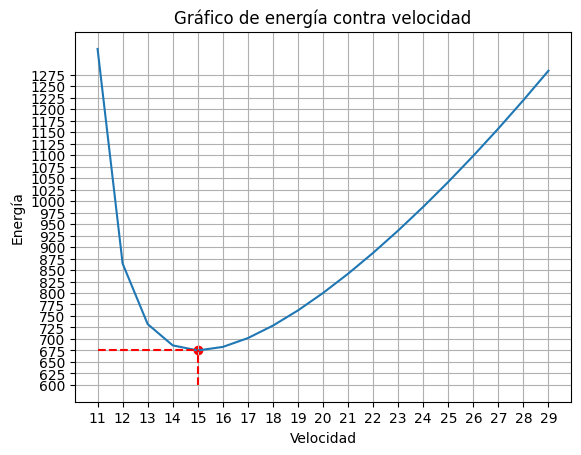

In [3]:
# graficar la funcion
import numpy as np
import matplotlib.pyplot as plt

dominio = np.arange(11, 30)

rango = energia(dominio)
plt.title('Gráfico de energía contra velocidad')
plt.plot(dominio, rango)  # gráfico de líneas con la función plot


plt.xlabel('Velocidad')

plt.ylabel('Energía')

plt.grid(alpha = 1)  # poner la cuadrícula

plt.yticks(np.arange(600, 1300, 25))  # metrizar el eje vertical

plt.xticks(np.arange(10, 30, 1))  # metrizar el eje horizontal

plt.scatter([15], [675], color = 'red')

plt.plot([15, 15], [600, 675], 'r--')
plt.plot([11, 15], [675, 675], 'r--')

plt.show()



Mi suposición parece cierta, pues el gráfico me indica que la energía, se minimiza para una velocidad de 15 y esa energía mínima es de 675 unidades de energía (algunas unidades de energía son los julios). 

In [4]:
# derivar e igualar a cero para encontrar los puntos críticos

from sympy import * # en sympy las dos son con y

k,d, velocidad_pez, velocidad_rio, energia = var("k,d, velocidad_pez, velocidad_rio, energia")
d = 1
velocidad_rio = 10
k = 1

energia = k*(d/(velocidad_pez-velocidad_rio))*velocidad_pez**3

derivada = diff(energia, velocidad_pez)

ecuacion = Eq(derivada, 0)

solve(ecuacion, velocidad_pez)[1].evalf()




15.0000000000000

# Redactar la conclusión o conclusiones

La velocidad necesaria para minimizar la energía empleada en nadar a contracorriente una distancia de un kilometro es de $15$ $Km/h$. Esto me lo aseguró, la derivada de la función de energía que tenía.  

#  Crear la tabla de datos para graficar la función (DataFrame)

In [9]:
import pandas as pd  # pandas es el experto en tablas
import numpy as np  # es para vectores y matrices como en geometría vectorial y algebra lineal. 

def energia(velocidad_pez):
    return k*(d/(velocidad_pez-velocidad_rio))*velocidad_pez**3

Velocidades_pez = np.arange(11, 30, 0.5)
Energias = energia(Velocidades_pez)


tabla_completa = pd.DataFrame({'Velocidades del pez': Velocidades_pez, 'Energias empleadas': Energias})

tabla_completa

,Velocidades del pez,Energias empleadas
0,11.0,1331.000000
1,11.5,1013.916667
2,12.0,864.000000
3,12.5,781.250000
4,13.0,732.333333
5,13.5,702.964286
6,14.0,686.000000
7,14.5,677.472222
8,15.0,675.000000
9,15.5,677.068182


## Interpretaciones fruto de la lectura de este texto tabular

* 

# Gráfico interactivo con plotly



In [10]:
import plotly.express as px 
import plotly.io as pio


fig = px.line(tabla_completa, x = 'Velocidades del pez', y = 'Energias empleadas', \
              title = 'Energía empleada vs velocidad del pez en contracorriente')

fig.show() 

pio.write_image(fig, 'energia_vs_velocidad.jpg')


* La función de energía es decreciente antes de 15 y creciente para valores mayores de 15. Es decir, si el pez se quiere mover a una velocidad mayor a 15, entonces, la energía empleada será cada vez mayor. 

## Referentes  

